## explore_zillow

### Prepare environment

In [57]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import acquire_zillow as acq
import acquire_mall as acq_mall
import prepare_zillow as prep_z
import prepare_mall as prep_mall

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Initial look at raw data

In [58]:
df_zillow_total = acq.all_zillow_data()
df_zillow_total.head(3)

,transactiondate,logerror,parcelid,airconditioningdesc,architecturalstyledesc,basementsqft,bathroomcnt,bedroomcnt,buildingclassdesc,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemdesc,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusedesc,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storydesc,threequarterbathnbr,typeconstructiondesc,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,2016-01-01,0.03,11016594,Central,None,nan,2.00,3.00,None,4.00,2.00,nan,nan,"1,684.00","1,684.00",nan,nan,nan,nan,"6,037.00",nan,2.00,nan,nan,nan,Central,"34,280,990.00","-118,488,536.00","7,528.00",nan,nan,nan,nan,nan,0100,Single Family Residential,LARS,"60,371,066.46","12,447.00","3,101.00","31,817.00","96,370.00",0.00,None,nan,None,1.00,nan,nan,"1,959.00",nan,nan,"122,754.00","360,170.00","2,015.00","237,416.00","6,735.88",None,nan,"60,371,066,461,001.00"
1,2016-01-01,-0.17,14366692,None,None,nan,3.50,4.00,None,nan,3.50,nan,nan,"2,263.00","2,263.00",nan,nan,nan,nan,"6,059.00",nan,3.00,2.00,468.00,nan,None,"33,668,120.00","-117,677,556.00","3,643.00",nan,nan,nan,nan,nan,1,Single Family Residential,None,"60,590,524.22","32,380.00","1,286.00",nan,"96,962.00",0.00,None,1.00,None,nan,nan,nan,"2,014.00",nan,nan,"346,458.00","585,529.00","2,015.00","239,071.00","10,153.02",None,nan,nan
2,2016-01-01,-0.00,12098116,Central,None,nan,3.00,2.00,None,4.00,3.00,nan,nan,"2,217.00","2,217.00",nan,nan,nan,nan,"6,037.00",nan,3.00,nan,nan,nan,Central,"34,136,312.00","-118,175,032.00","11,423.00",nan,nan,nan,nan,nan,0100,Single Family Residential,PSR6,"60,374,638.00","47,019.00","3,101.00","275,411.00","96,293.00",0.00,None,nan,None,1.00,nan,nan,"1,940.00",nan,nan,"61,994.00","119,906.00","2,015.00","57,912.00","11,484.48",None,nan,"60,374,638,003,004.00"


In [59]:
df_zillow_total.shape

(167854, 60)

### Apply prepare.py changes:

In [60]:
df_zillow_total = prep_z.data_prep(df_zillow_total)
df_zillow_total

,transactiondate,logerror,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,propertycountylandusecode,regionidcity,regionidcounty,regionidzip,yearbuilt,taxvaluedollarcnt,taxamount,censustractandblock
0,2016-01-01,0.03,11016594,2.00,3.00,"1,684.00",6037.0,"34,280,990.00","-118,488,536.00",0100,12447.0,3101.0,96370.0,1959.0,"360,170.00","6,735.88",60371066461001.0
2,2016-01-01,-0.00,12098116,3.00,2.00,"2,217.00",6037.0,"34,136,312.00","-118,175,032.00",0100,47019.0,3101.0,96293.0,1940.0,"119,906.00","11,484.48",60374638003004.0
4,2016-01-02,-0.01,14432541,2.50,4.00,"2,283.00",6059.0,"33,485,643.00","-117,700,234.00",122,17686.0,1286.0,96961.0,1981.0,"434,551.00","5,488.96",60590423381006.0
5,2016-01-02,-0.27,11509835,4.00,4.00,"3,067.00",6037.0,"33,870,089.00","-118,402,768.00",0100,29712.0,3101.0,96109.0,1982.0,"2,447,951.00","27,126.57",60376210044006.0
6,2016-01-02,0.04,12286022,1.00,2.00,"1,297.00",6037.0,"33,899,475.00","-118,212,720.00",0100,24174.0,3101.0,96091.0,1939.0,"111,521.00","2,304.97",60375416053007.0
10,2016-01-03,0.38,10854446,2.00,2.00,"1,417.00",6037.0,"34,164,671.00","-118,477,995.00",0100,12447.0,3101.0,96426.0,1954.0,"105,954.00","1,443.69",60371414003003.0
11,2016-01-03,-0.02,11672170,4.00,5.00,"3,080.00",6037.0,"34,072,220.00","-118,547,322.00",0100,12447.0,3101.0,96120.0,1995.0,"1,090,127.00","13,428.94",60372626011017.0
12,2016-01-03,0.03,10949761,2.00,3.00,"1,484.00",6037.0,"34,189,804.00","-118,339,183.00",0100,396054.0,3101.0,96437.0,1944.0,"70,119.00",832.35,60373110001009.0
14,2016-01-03,-0.04,14148540,2.00,2.00,"1,367.00",6059.0,"33,913,333.00","-117,914,140.00",122,17150.0,1286.0,97035.0,1955.0,"254,817.00","3,192.28",60590015031046.0
15,2016-01-03,0.00,14057104,2.00,3.00,"1,302.00",6059.0,"33,676,787.00","-117,950,591.00",122,25218.0,1286.0,96964.0,1964.0,"345,023.00","4,036.32",60590992162013.0


In [61]:
df_zillow_total.shape

(110238, 17)

#### Maggies code for outliers... selects by column and lists the min and max boundaries to mark outliers.
#### Add this to the prepare.py... test it first!

In [62]:
keys = ['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet']
values = [(1,7), (1,7), (500,8000), (25000,2000000), (10000,2500000)]

dictionary = dict(zip(keys, values))

for key, value in dictionary.items():
    df_zillow_total = df_zillow_total[df_zillow_total[key] >= value[0]]
    df_zillow_total = df_zillow_total[df_zillow_total[key] <= value[1]]

In [63]:
df_zillow_total.shape

(109630, 17)

#### Now, create dummy columns on the FIPS (county identifier)

In [64]:
#create dummy columns on the FIPS
dummy = pd.get_dummies(df_zillow_total['fips'],prefix='fips')
df_zillow_total = pd.concat([df_zillow_total, dummy], axis=1)
df_zillow_total.head()

,transactiondate,logerror,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,propertycountylandusecode,regionidcity,regionidcounty,regionidzip,yearbuilt,taxvaluedollarcnt,taxamount,censustractandblock,fips_6037.0,fips_6059.0,fips_6111.0
0,2016-01-01,0.03,11016594,2.00,3.00,"1,684.00",6037.0,"34,280,990.00","-118,488,536.00",0100,12447.0,3101.0,96370.0,1959.0,"360,170.00","6,735.88",60371066461001.0,1,0,0
2,2016-01-01,-0.00,12098116,3.00,2.00,"2,217.00",6037.0,"34,136,312.00","-118,175,032.00",0100,47019.0,3101.0,96293.0,1940.0,"119,906.00","11,484.48",60374638003004.0,1,0,0
4,2016-01-02,-0.01,14432541,2.50,4.00,"2,283.00",6059.0,"33,485,643.00","-117,700,234.00",122,17686.0,1286.0,96961.0,1981.0,"434,551.00","5,488.96",60590423381006.0,0,1,0
5,2016-01-02,-0.27,11509835,4.00,4.00,"3,067.00",6037.0,"33,870,089.00","-118,402,768.00",0100,29712.0,3101.0,96109.0,1982.0,"2,447,951.00","27,126.57",60376210044006.0,1,0,0
6,2016-01-02,0.04,12286022,1.00,2.00,"1,297.00",6037.0,"33,899,475.00","-118,212,720.00",0100,24174.0,3101.0,96091.0,1939.0,"111,521.00","2,304.97",60375416053007.0,1,0,0


In [65]:
df_zillow_total.shape

(109630, 20)

In [68]:
fips_codes = ['fips_6037.0','fips_6059.0','fips_6111.0']
df_zillow_total[fips_codes].sum()

fips_6037.0    70689
fips_6059.0    29750
fips_6111.0     9191
dtype: int64

In [69]:
df_zillow_total.columns

Index(['transactiondate', 'logerror', 'parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude', 'propertycountylandusecode', 'regionidcity', 'regionidcounty', 'regionidzip', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount', 'censustractandblock', 'fips_6037.0', 'fips_6059.0', 'fips_6111.0'], dtype='object')

#### Now, peek at the newly prepared df:

In [70]:
look_zillow = prep_z.peekatdata(df_zillow_total)


 
 SHAPE:
(109630, 20)

 
 COLS:
Index(['transactiondate', 'logerror', 'parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude', 'propertycountylandusecode', 'regionidcity', 'regionidcounty', 'regionidzip', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount', 'censustractandblock', 'fips_6037.0', 'fips_6059.0', 'fips_6111.0'], dtype='object')

 
 INFO:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 109630 entries, 0 to 167887
Data columns (total 20 columns):
transactiondate                 109630 non-null object
logerror                        109630 non-null float64
parcelid                        109630 non-null object
bathroomcnt                     109630 non-null float64
bedroomcnt                      109630 non-null float64
calculatedfinishedsquarefeet    109630 non-null float64
fips                            109630 non-null object
latitude                        109630 non-null float64
longitude                       109630 non-nul

In [71]:
df_zillow_total.describe(include='all')

,transactiondate,logerror,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,propertycountylandusecode,regionidcity,regionidcounty,regionidzip,yearbuilt,taxvaluedollarcnt,taxamount,censustractandblock,fips_6037.0,fips_6059.0,fips_6111.0
count,109630,"109,630.00",109630,"109,630.00","109,630.00","109,630.00",109630,"109,630.00","109,630.00",109630,109630,109630,109630,109630,"109,630.00","109,630.00",109630,"109,630.00","109,630.00","109,630.00"
unique,607,nan,107825,nan,nan,nan,3,nan,nan,23,177,3,378,135,nan,nan,47019,nan,nan,nan
top,2017-06-30,nan,17237150,nan,nan,nan,6037.0,nan,nan,0100,12447.0,3101.0,97319.0,1955.0,nan,nan,60590320231024.0,nan,nan,nan
freq,787,nan,3,nan,nan,nan,70689,nan,nan,56192,24133,70689,1626,4001,nan,nan,55,nan,nan,nan
mean,NaN,0.01,NaN,2.27,3.29,"1,885.41",NaN,"34,018,951.07","-118,190,865.23",NaN,NaN,NaN,NaN,NaN,"493,141.52","6,239.41",NaN,0.64,0.27,0.08
std,NaN,0.17,NaN,0.96,0.91,903.09,NaN,"271,890.95","355,006.44",NaN,NaN,NaN,NaN,NaN,"581,570.88","6,928.29",NaN,0.48,0.44,0.28
min,NaN,-4.66,NaN,1.00,1.00,500.00,NaN,"33,340,045.00","-119,475,265.00",NaN,NaN,NaN,NaN,NaN,"1,000.00",49.08,NaN,0.00,0.00,0.00
25%,NaN,-0.03,NaN,2.00,3.00,"1,267.00",NaN,"33,825,332.50","-118,394,566.25",NaN,NaN,NaN,NaN,NaN,"189,054.25","2,785.59",NaN,0.00,0.00,0.00
50%,NaN,0.01,NaN,2.00,3.00,"1,647.00",NaN,"34,019,618.00","-118,148,467.50",NaN,NaN,NaN,NaN,NaN,"360,000.00","4,675.16",NaN,1.00,0.00,0.00
75%,NaN,0.04,NaN,3.00,4.00,"2,263.00",NaN,"34,184,088.25","-117,928,060.50",NaN,NaN,NaN,NaN,NaN,"593,446.75","7,244.69",NaN,1.00,1.00,0.00


In [72]:
df_zillow_total.shape

(109630, 20)

In [14]:
#prep_z.check_missing_values_col(df_zillow_total)

In [73]:
df_zillow_total.columns

Index(['transactiondate', 'logerror', 'parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude', 'propertycountylandusecode', 'regionidcity', 'regionidcounty', 'regionidzip', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount', 'censustractandblock', 'fips_6037.0', 'fips_6059.0', 'fips_6111.0'], dtype='object')

#### View the distribution of the numeric variables

Plot a histogram of each variable.

Why? To see the distribution, skewness, outliers, and unit scales. You will use this information in your decision of whether to normalize, standardize or neither.

#### Histograms of all variables in dataframe:

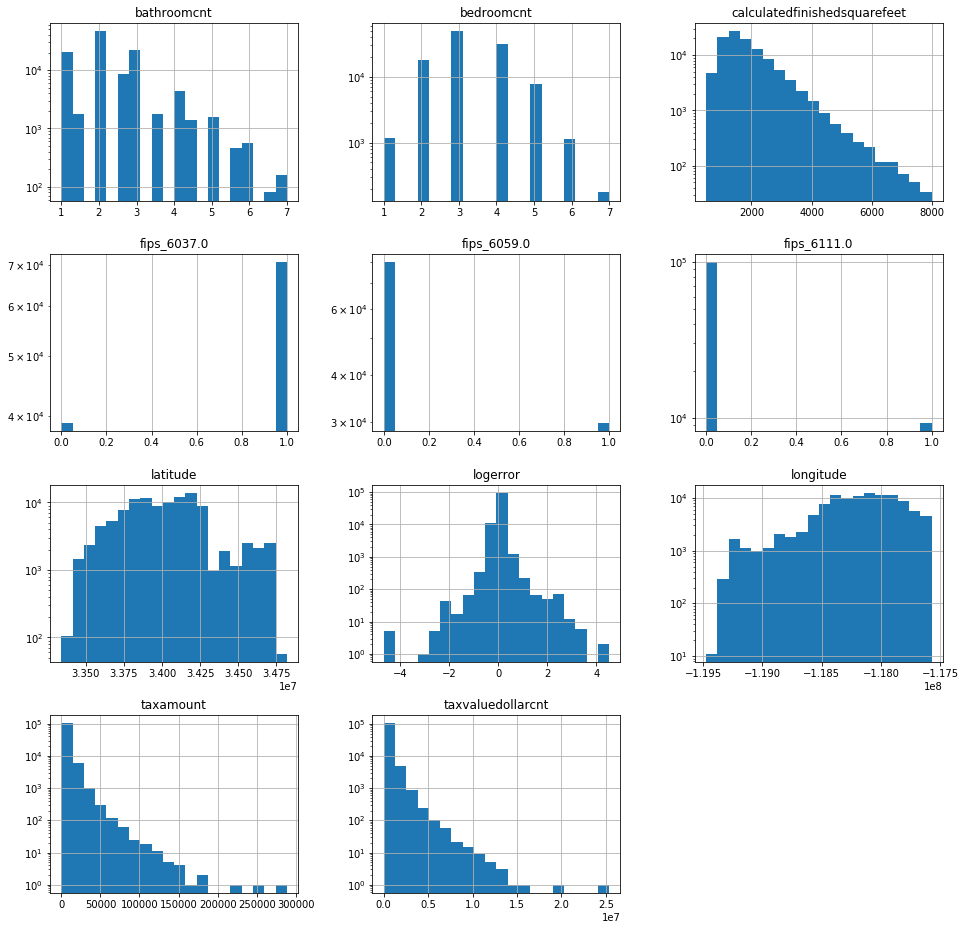

In [74]:
def zillow_hist(df):
    df_zillow_total.hist(figsize=(16,16), bins=20, log=True)
    plt.show()

zillow_hist(df_zillow_total)

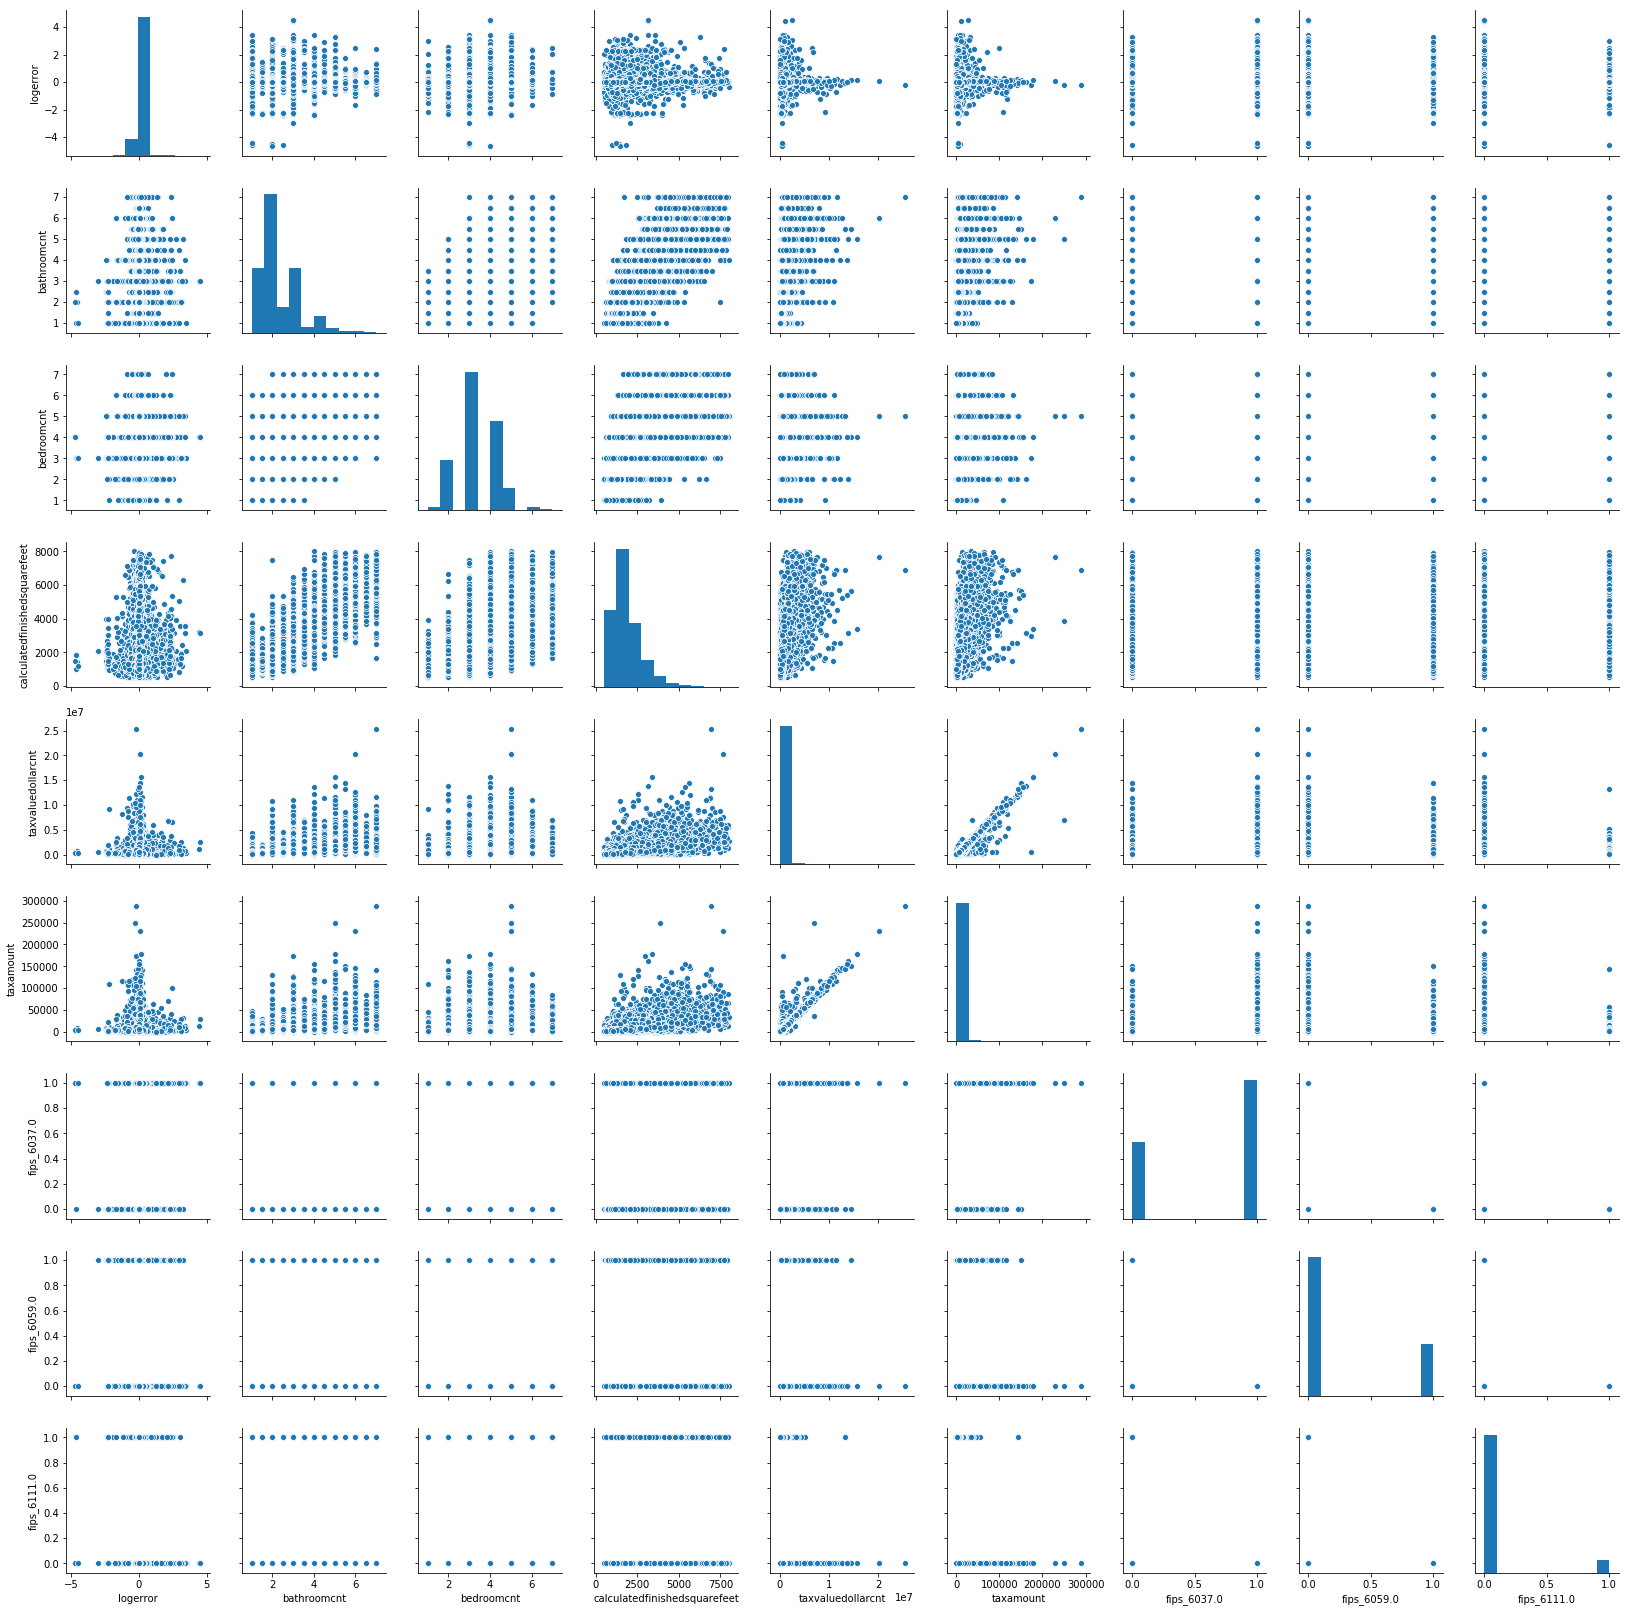

In [78]:
import seaborn as sns

def zillow_pair(df):
    sns.pairplot(df_zillow_total.select_dtypes('number').drop(columns=['latitude', 'longitude']))

zillow_pair(df_zillow_total)

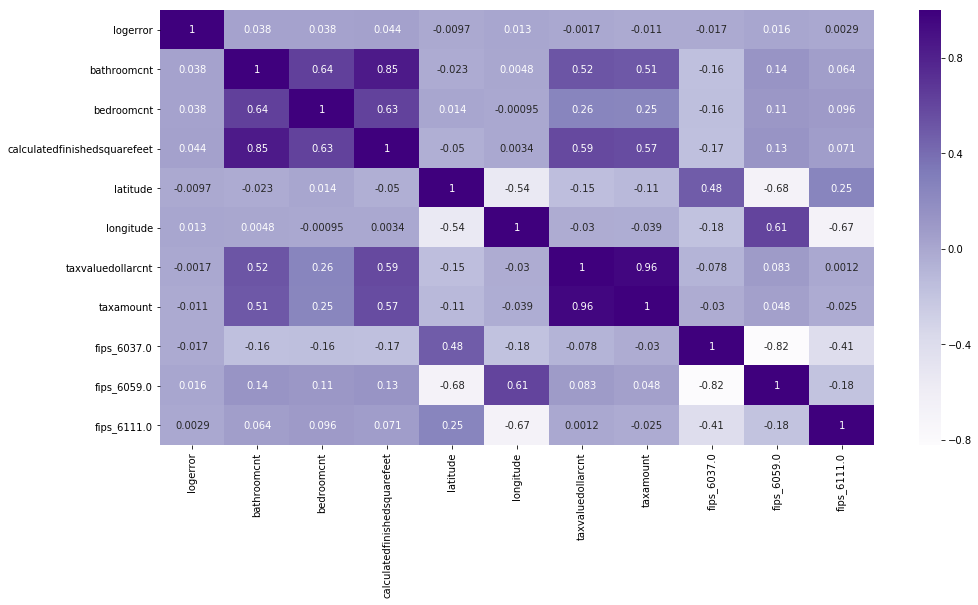

In [75]:
def zillow_heat(df):
    plt.figure(figsize=(16,8))
    sns.heatmap(df.corr(), cmap='Purples', annot=True)

zillow_heat(df_zillow_total)

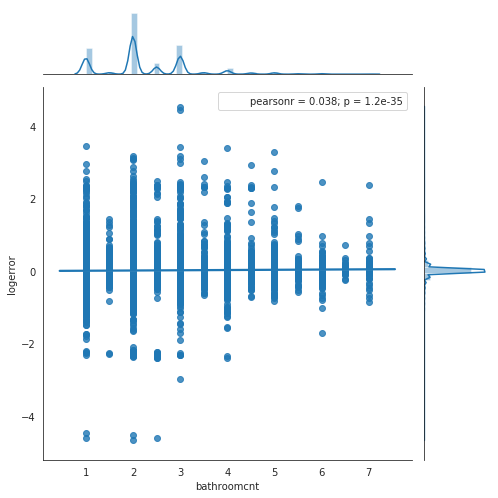

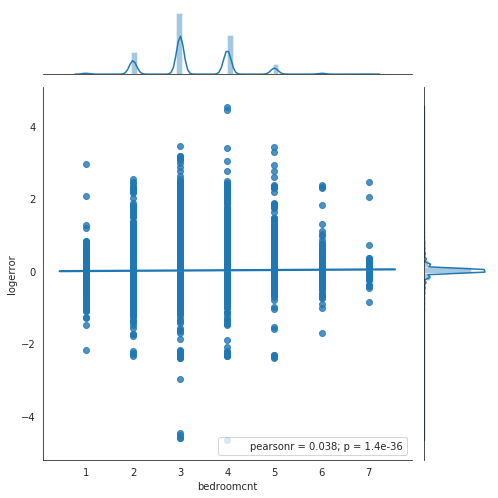

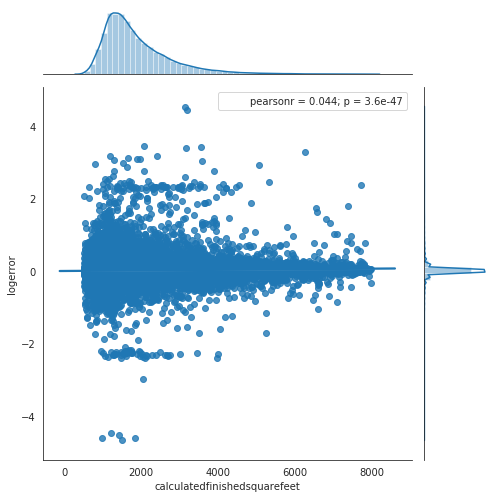

In [76]:
def zillow_joint(df):
    for i, col in enumerate(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet']):
        with sns.axes_style('white'):
            plot_number = i + 1
            series = df[col]
            j = sns.jointplot(df[col], 'logerror', data=df, kind='reg', height=7)
            j.annotate(stats.pearsonr)
    plt.show

zillow_joint(df_zillow_total)

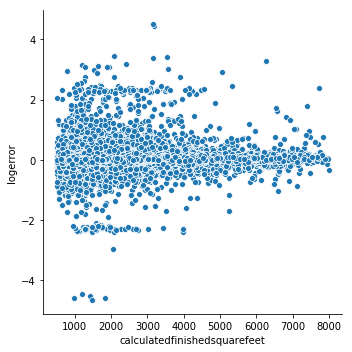

In [77]:
sns.relplot(x='calculatedfinishedsquarefeet', y='logerror', data=df_zillow_total)

In [ ]:
['transactiondate', 'logerror', 'parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
 'fips', 'latitude', 'longitude', 'propertycountylandusecode', 'regionidcity', 'regionidcounty', 'regionidzip',
 'yearbuilt', 'taxvaluedollarcnt', 'taxamount', 'censustractandblock', '6037.0', '6059.0', '6111.0']

KeyboardInterrupt: 

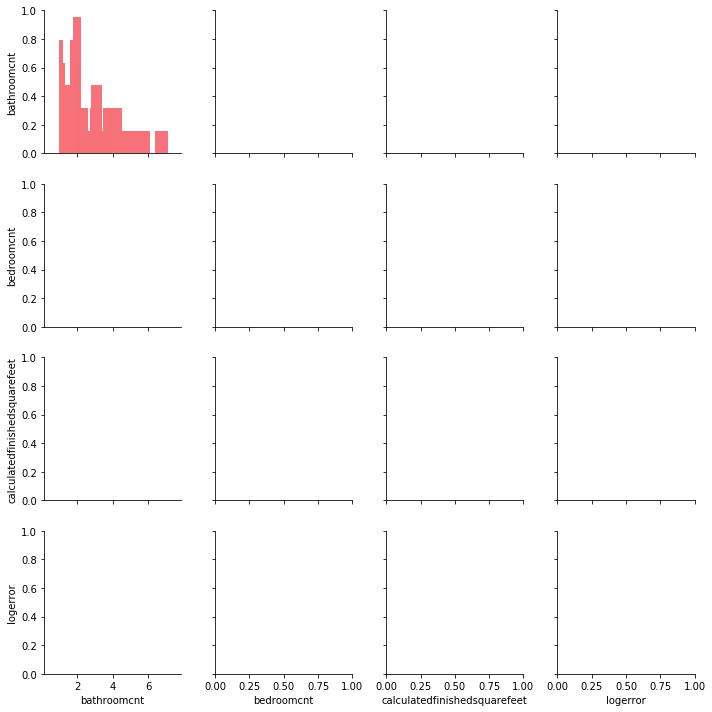

In [36]:
g = sns.pairplot(df_zillow_total[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'logerror']], hue='logerror', diag_kind="hist")
 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

In [ ]:
[[column, pearsonr(df_zillow_total[column], df_zillow_total.logerror)] for column in df_zillow_total]

In [ ]:
g = sns.PairGrid(df_zillow_total)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

# train dataframe

ValueError: color kwarg must have one color per data set. 109630 data sets and 1 colors were provided

Perform at least 1 t-test and 1 chi square test.

In [ ]:
df_zillow

In [ ]:
pd.crosstab(df["sex"], df["smoker"], margins=True)

In [ ]:
tbl = pd.crosstab(df["sex"], df["smoker"])
stat, p, dof, expected = stats.chi2_contingency(tbl)
prob = .95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
print(p)

pearson's r

In [ ]:
r, pval = stats.pearsonr(df.total_bill, df.tip)
print("Pearson's R: {}, P-Value: {}".format(r, pval))

In [ ]:
t-test

In [ ]:
stats.ttest_ind(
    df[df.smoker == 'Yes'].total_bill.dropna(),
    df[df.smoker == 'No'].total_bill.dropna())

In [46]:
#use this later to convert year built to age
age = 2017 - df_zillow_total.yearbuilt.astype(float)
age


In [ ]:
plt.figure(figsize=(16,10))
for i, col in enumerate(['exam1', 'exam2','exam3', 'final_grade']):
    plot_number = i + 1
    series = df_grades[col]
    plt.subplot(2, 2, plot_number)
    plt.title(col)
    series.hist(bins=20, density=False, cumulative=False, log=False)

# plt.figure(figsize=(16, 10))

# for i, col in enumerate(['exam1', 'exam2', 'exam3', 'final_grade']):
#     plot_number = i + 1 # i starts at 0, but plot nos should start at 1
#     series = df[col]
#     plt.subplot(2, 2, plot_number)
#     plt.title(col)
#     series.hist(bins=20, density=False, cumulative=False, log=False)

In [ ]:
plt.figure(figsize=(8,4))

sns.boxplot(data=df_grades.drop(columns=['student_id']))

In [ ]:
with sns.axes_style('white'):
    j = sns.jointplot('exam1', 'final_grade', data=train, kind='reg', height=7);
    j.annotate(stats.pearsonr)
plt.show()

In [ ]:
for i, col in enumerate(['exam1', 'exam2','exam3']):
       with sns.axes_style('white'):
            plot_number = i + 1
            series = df_grades[col]
            j = sns.jointplot(train[col], "final_grade", data=train, kind='reg', height=5)
            j.annotate(stats.pearsonr)
plt.show()

In [ ]:
pearsonr(X_train[['exam1']], y_train)

# this generates the R-square and the p-value

In [ ]:
[[column, pearsonr(train[column], train.final_grade)] for column in X_train]

#this generates the column name (x axes), the pearsonr and the p-value for each column (each X axes) in train df,
# in correlation with the train.final_grade (y axis)

In [ ]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

#this is just like the regression print out / descriptive statistics thing in EXCEL

In [17]:
# plt.figure(figsize=(20,10))
# for i, col in enumerate(['logerror', 'bathroomcnt', 'bedroomcnt',
#                          'calculatedfinishedsquarefeet',  'regionidcity',
#                          'regionidcounty', 'regionidzip', 'yearbuilt',
#                          'taxvaluedollarcnt', 'taxamount', 'censustractandblock',
#                          '6037.0', '6059.0', '6111.0']):
# #     ['calculatedfinishedsquarefeet',
# #       'lotsizesquarefeet',
# #       'taxvaluedollarcnt',
# #       'structuretaxvaluedollarcnt',
# #       'landtaxvaluedollarcnt',
# #       'taxamount',
# #       'logerror',
# #       'pp_sqft',
# #       'bedroomcnt']):
#     plot_number = i + 1
#     series = df_zillow_total[col]
#     plt.subplot(5, 3, plot_number)
#     plt.title(col)
#     series.hist(bins=20, density=False, cumulative=False, log=True)

In [ ]:
Binning using pd.qcut

In [ ]:
df['tip'] = pd.qcut(df['tip'], 4, labels=False)
df['tip'].value_counts()

In [ ]:
scaler = StandardScaler()
df[['size','tip','total_bill']] = scaler.fit_transform(df[['size','tip','total_bill']])
df[['size','tip','total_bill']] = scaler.transform(df[['size','tip','total_bill']])
print(df.describe())